In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from aiccelerator import AIccelerator
import pandas as pd

In [2]:
ai = AIccelerator.AIccelerator()

In [3]:
# Weather dataset thanks to Univeridad de Antioquia
data = pd.read_csv('data.csv',sep=',')

In [4]:
data = data[['Outside Temperature', 'Barometer', 'Outside Humidity', 'Tiempo Sistema']]
data = data.sort_values(by=['Tiempo Sistema'], ascending=[True])
data['Tiempo Sistema'] = pd.to_datetime(data['Tiempo Sistema'], format='%Y-%m-%d %H:%M:%S')
data = data.loc[(data['Tiempo Sistema'] >= '2020-03-01') & (data['Tiempo Sistema'] <= '2020-03-15')]
data= data.set_index('Tiempo Sistema')

In [5]:
ai.data = data

In [6]:
ai.data.dtypes

Outside Temperature    float64
Barometer              float64
Outside Humidity       float64
dtype: object

In [7]:
# Shows a heatmap over a pandas dataframe to facilitate visualization of correlations
ai.get_correlations()

,Outside Temperature,Barometer,Outside Humidity
Outside Temperature,1.00,-0.45,-0.95
Barometer,-0.45,1.00,0.41
Outside Humidity,-0.95,0.41,1.00


In [8]:
# Or using ppscore from 8080labs we can facilitate the selection of predictors
ai.get_predictive_power_score()

x,Barometer,Outside Humidity,Outside Temperature
y,,,
Barometer,1.00,0.16,0.16
Outside Humidity,0.09,1.00,0.78
Outside Temperature,0.13,0.76,1.00


In [9]:
# Assign the column as objective of the prediction
ai.target = 'Outside Temperature'

In [10]:
# Set the columns that you decided to use
ai.selected_columns = ['Barometer','Outside Humidity']

In [11]:
# Using lazypredict to generate the metric of the models
ai.aiccelerate_regressor(random_split=False,test_size=0.2)

100%|██████████| 43/43 [02:37<00:00,  3.66s/it]


In [12]:
ai.models

,R-Squared,RMSE,Time Taken
Model,,,
LinearSVR,0.95,0.63,0.07
RANSACRegressor,0.94,0.65,0.02
HuberRegressor,0.94,0.67,0.06
GradientBoostingRegressor,0.94,0.67,0.45
ElasticNetCV,0.93,0.73,0.15
RidgeCV,0.93,0.73,0.02
Ridge,0.93,0.73,0.02
BayesianRidge,0.93,0.73,0.02
LinearRegression,0.93,0.73,0.02


In [13]:
# Replicating the pipeline from lazypredict this command give us an usable model
ai.make_pipeline()

In [14]:
ai.pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Barometer', 'Outside Humidity'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoding',
                                        

In [15]:
import matplotlib.pyplot as plt 

In [16]:
# making predictions is using ai.pipeline.predict(newdata)
predictions=pd.DataFrame(ai.pipeline.predict(ai.X_test),ai.data.index[ai.X_train.shape[0]:])

<AxesSubplot:xlabel='Tiempo Sistema'>

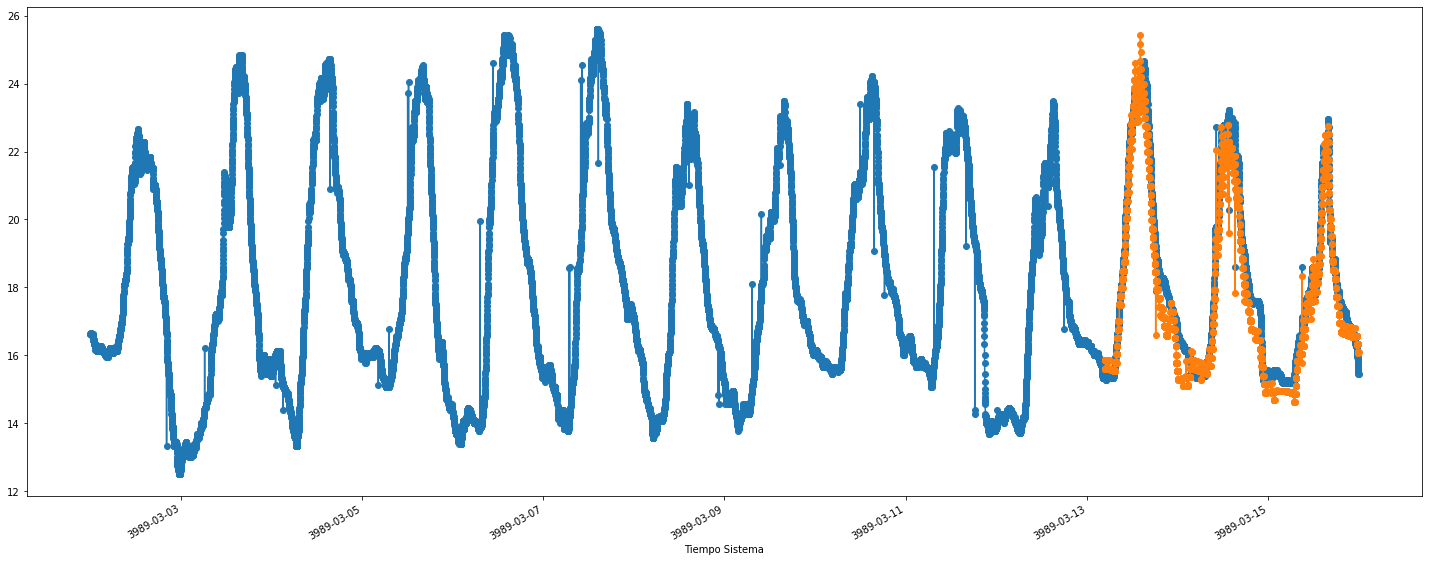

In [17]:
# Validating the output
plt.figure(figsize=(25,10))
ai.data['Outside Temperature'].plot(marker='o')
predictions[0].plot(marker='o')